In [1]:
import numpy as np
import pandas as pd
from numpy import linalg as LA
from scipy.sparse import csr_matrix
from numpy import savetxt
import networkx as nx
from scipy.linalg import eigh as largest_eigh
from scipy.sparse.linalg.eigen.arpack import eigsh as largest_eigsh

from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [2]:
def GraphSpectra(file_path):
    #file_path = 'example1.dat'
    file_read = open(file_path, "r", encoding="latin-1")

    col1 = []
    col2 = []
    col3 = []

    Lines = file_read.readlines()
    for line in Lines:
        tmp_list = line.rstrip().split(',')

        node1 = int(tmp_list[0])
        node2 = int(tmp_list[1])
        col1.append(node1)
        col2.append(node2)
        col3.append((node1, node2))

    file_read.close() 
    
    # m_size = how many data point do we have?
    m_size = col1 if max(col1) > max(col2) else max(col2) # 241
    # len_col1 must be equal to len_col2
    len_col1 = len(col1) # 2196

    print('m_size: {}, len_col1: {}'.format(m_size, len_col1))
    
    # in Adjacency, we just show if there is an edge between the nodes or not. so the weight is 0 or 1 only
    G = nx.Graph(col3)
    A_adjacency1 = nx.adjacency_matrix(G)
    # type(A_adjacency) = numpy.matrix
    A_adjacency = A_adjacency1.todense() # (241, 241)
    #savetxt('A_adjacency.csv', A_adjacency, delimiter=',')
    
    # type(sum_A_adjacency) = numpy.matrix 
    sum_A_adjacency = sum(A_adjacency)  # (1, 241)
    
    D_adjacency = np.zeros((m_size,m_size))
    
    for i in range(m_size):
        D_adjacency[i, i] = sum_A_adjacency[0, i]
    
    D_sqrt_inv = np.linalg.inv(np.sqrt(D_adjacency)) # (241, 241)
    
    L_1 = np.dot(D_sqrt_inv, A_adjacency)
    L = np.dot(L_1, D_sqrt_inv) # (241, 241)
    
    eig_val, eig_vec = LA.eig(L)  # (241,), (241, 241)
    
    # https://stackoverflow.com/questions/31884985/what-does-selecting-the-largest-eigenvalues-and-eigenvectors-in-the-covariance-m
    eig_val_sorted = np.sort(eig_val)[::-1]
    diff_eig_val_sorted = np.diff(eig_val_sorted, axis=0)
    diff_eig_val_sorted = abs(diff_eig_val_sorted)
    #diff_eig_val_sorted
    #diff_eig_val_sorted[0:20]
    max_diff = max(diff_eig_val_sorted)
    k = diff_eig_val_sorted.argmax() + 1
    
    # https://stackoverflow.com/questions/12167654/fastest-way-to-compute-k-largest-eigenvalues-and-corresponding-eigenvectors-with
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.eigsh.html
    # ‘LM’ : Largest (in magnitude) eigenvalues.
    evals_large_sparse, evecs_large_sparse = largest_eigsh(L, k, which='LM')
    #evals_large_sparse
    #evals_large_sparse_all, evecs_large_sparse_all = largest_eigsh(L, 5, which='LM')
    #evals_large_sparse_all
    
#     eig_val_round = np.zeros(eig_val.size)
#     for idx, mm in enumerate(eig_val):
#         eig_val_round[idx] = round(mm, 8)

    #eig_val_round[0:30]
    #np.where(eig_val_round == 0.77851335)
    
    X = evecs_large_sparse
    X_0 = X.shape[0]
    X_1 = X.shape[1]
    Y = np.zeros((X_0, X_1))
    for i in range(X_0):
        for j in range(X_1):       
            Y[i, j] = X[i, j]/np.sqrt(sum(pow(X[i,:], 2)))
            
    #X[10:20,0]
    #Y[10:20,0]
    
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    pred_y = kmeans.fit_predict(Y)
    
    #plt.scatter(Y[:,0], Y[:,1])
    #plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
    #plt.show()
    #plt.scatter(col1, col2)
    
    print('pred_y: {}:\n'.format(pred_y))
    
    #nx.draw_networkx_edges(G, pos=nx.spring_layout(G))
    #nx.draw_networkx_edges(G, pos=nx.fruchterman_reingold_layout(G))
    #plt.show()

    nx.draw(G, with_labels = True)
    #plt.savefig('labels.png')
    
    idx_y = list(range(1, len(pred_y) + 1))

    df = pd.DataFrame({'idx': idx_y, 'cluster': pred_y})
    
    return df
    

m_size: 241, len_col1: 2196
pred_y: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]:



/Users/zengxing/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


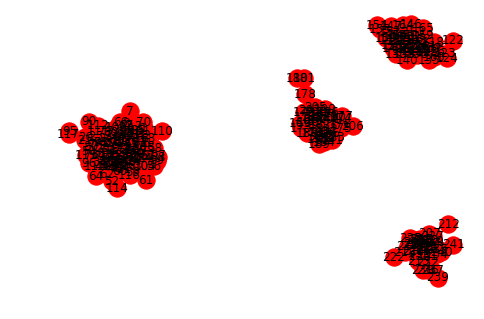

In [3]:
df1 = GraphSpectra('example1.dat')
df1.to_csv('df1.csv', index=False)

m_size: 100, len_col1: 2418
pred_y: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 0 0 0]:



/Users/zengxing/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


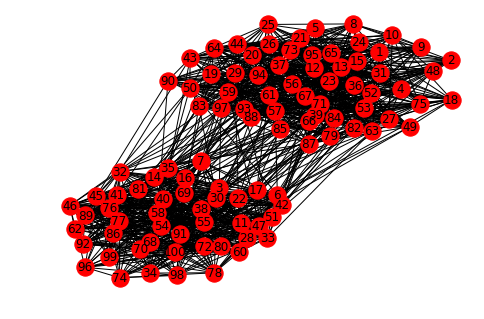

In [4]:
df2 = GraphSpectra('example2.dat')
df2.to_csv('df2.csv', index=False)